# COVID-19-Vaccine-Willingness-and-Hesitancy-among-Residents-in-Qatar: A Quantitative Analysis based on Machine Learning

# Connect to Google Drive

Mount GDrive

In [1]:
from google.colab import drive
drive.mount('/content/GDrive')

Drive already mounted at /content/GDrive; to attempt to forcibly remount, call drive.mount("/content/GDrive", force_remount=True).


Move to the Target Directory by using the Copied Path

In [2]:
%cd /content/GDrive/MyDrive/Colab_Notebooks/Statistics Project

/content/GDrive/MyDrive/Colab_Notebooks/Statistics Project


List the Files present into the Current Directory

In [3]:
!ls

COVID_19_Vaccine_Willingness_and_Hesitancy_among_Residents_in_Qatar.ipynb
logs.log
ml_models.py
__pycache__
Vaccine.csv
Vaccine_Dummy_2_2.csv
Vaccine_Dummy.csv
Vaccine_Dummy_FR_H.csv
Vaccine_Dummy_FR_W.csv


Upload local files into GDrive

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#Import Necessary Libraries

In [4]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import scipy
import numpy as np
from ml_models import *
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_roc_curve
from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, classification_report

In [5]:
%matplotlib inline
sns.set_style('white')

Install PyCaret and Restart the Runtime to Enable COLAB Mode for PyCaret

In [ ]:
!pip install pycaret

In [6]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Data Analysis

Import Data from the CSV Files uploaded into the GDrive Folder

In [7]:
df_Covid_Response = pd.read_csv('Vaccine.csv')

## Analyze Whole Dataset

Have a look at the Data Inside the Vaccine DataFrame

In [11]:
print(df_Covid_Response.shape)
df_Covid_Response.head(10)

(175, 23)


Timestamp  ... I am more willing to take the vaccine if I do not have to do mandatory home quarantine after travelling
0  2021/03/07 10:49:57 AM GMT+3  ...                                                7.0                                                     
1  2021/03/07 11:02:54 AM GMT+3  ...                                                6.0                                                     
2  2021/03/07 11:52:56 AM GMT+3  ...                                                7.0                                                     
3  2021/03/07 11:57:26 AM GMT+3  ...                                                7.0                                                     
4  2021/03/07 12:10:50 PM GMT+3  ...                                                7.0                                                     
5  2021/03/07 12:37:51 PM GMT+3  ...                                                7.0                                                     
6  2021/03/07 12:46:09 PM GMT+3  ...                                                7.0                                                     
7   2021/03/07 1:05:14 PM GMT+3  ...                                                7.0                                                     
8   2021/03/07 1:16:19 PM GMT+3  ...                                                1.0                                                     
9   2021/03/07 1:42:00 PM GMT+3  ...                                                1.0                                                     

[10 rows x 23 columns]

View Vaccine Columns

In [12]:
df_Covid_Response.columns

Index(['Timestamp', 'How old are you?', 'What is your biological sex?',
       'Choose one or more races that you consider yourself to be:',
       'What is the highest level of school you have completed or the highest degree you have received?',
       'What is your current employment status?',
       'What is your relationship status?',
       'Did you take the COVID-19 Vaccine?',
       'I am willing to take the vaccine',
       'I have some doubts or hesitations about taking the vaccine',
       'Have you taken a flu vaccine in the past?',
       'Did you take the vaccine in Qatar?',
       'What were the side effects you experienced from taking previous vaccines?',
       'Based on my previous experience with vaccines, I have concerns with taking the COVID-19 Vaccine.',
       'Taking the vaccine should be a personal choice if I am following safety procedures',
       'Seeing Public Figures or Heads of State take the vaccine increases my willingness to take the vaccine',
       'M

In [13]:
print(f'Number of Columns in the Original DataFrame = {len(df_Covid_Response.columns)}')

Number of Columns in the Original DataFrame = 23


### Replace NULL values in a Single Column

Check for the presence of Null values in the DataFrame

In [14]:
df_Covid_Response.isnull().values.any()

True

In [15]:
print(f'Total NULL values in the Original DataFrame = {df_Covid_Response.isnull().sum().sum()}')

Total NULL values in the Original DataFrame = 250


NULL values by column

In [16]:
df_Covid_Response.isnull().sum()

Timestamp                                                                                                   0
How old are you?                                                                                            0
What is your biological sex?                                                                                0
Choose one or more races that you consider yourself to be:                                                  0
What is the highest level of school you have completed or the highest degree you have received?             0
What is your current employment status?                                                                     0
What is your relationship status?                                                                           0
Did you take the COVID-19 Vaccine?                                                                          0
I am willing to take the vaccine                                                                            0
I have som

Select a column with many NULL values or No Responses

In [17]:
df_test_1 = df_Covid_Response['Did you take the vaccine in Qatar?']
df_test_1.head(10)

0    Yes
1    Yes
2    Yes
3    Yes
4    NaN
5    NaN
6     No
7     No
8    Yes
9    Yes
Name: Did you take the vaccine in Qatar?, dtype: object

Total number of NULL values in that column

In [18]:
df_test_1.isnull().sum()

77

Print out the indices of the NULL values in that column

In [19]:
df_Covid_Response.loc[pd.isna(df_test_1), :].index

Int64Index([  4,   5,  10,  14,  17,  22,  27,  36,  40,  41,  42,  43,  45,
             46,  47,  48,  49,  50,  51,  56,  57,  58,  60,  61,  62,  64,
             65,  66,  68,  70,  71,  77,  78,  79,  80,  83,  88,  93,  95,
             96,  97,  99, 100, 101, 106, 108, 110, 111, 112, 113, 116, 118,
            119, 121, 123, 124, 126, 127, 131, 132, 134, 135, 137, 142, 144,
            148, 149, 154, 155, 157, 158, 159, 161, 162, 164, 169, 171],
           dtype='int64')

Replace NULL values in that column with a statement

In [20]:
df_test_1 = df_test_1.fillna('No Response')
df_test_1.head(10)

0            Yes
1            Yes
2            Yes
3            Yes
4    No Response
5    No Response
6             No
7             No
8            Yes
9            Yes
Name: Did you take the vaccine in Qatar?, dtype: object

NULL values have successfully been removed

In [21]:
df_test_1.isnull().sum()

0

### Replace NULL values in the whole DataFrame

In [22]:
for i in range(0,len(df_Covid_Response.columns)):
  df_Covid_Response[df_Covid_Response.columns[i]] = df_Covid_Response[df_Covid_Response.columns[i]].fillna(0)

In [23]:
df_Covid_Response.isnull().sum()

Timestamp                                                                                                  0
How old are you?                                                                                           0
What is your biological sex?                                                                               0
Choose one or more races that you consider yourself to be:                                                 0
What is the highest level of school you have completed or the highest degree you have received?            0
What is your current employment status?                                                                    0
What is your relationship status?                                                                          0
Did you take the COVID-19 Vaccine?                                                                         0
I am willing to take the vaccine                                                                           0
I have some doubts 

In [24]:
df_Covid_Response.head(5)

Timestamp  ... I am more willing to take the vaccine if I do not have to do mandatory home quarantine after travelling
0  2021/03/07 10:49:57 AM GMT+3  ...                                                7.0                                                     
1  2021/03/07 11:02:54 AM GMT+3  ...                                                6.0                                                     
2  2021/03/07 11:52:56 AM GMT+3  ...                                                7.0                                                     
3  2021/03/07 11:57:26 AM GMT+3  ...                                                7.0                                                     
4  2021/03/07 12:10:50 PM GMT+3  ...                                                7.0                                                     

[5 rows x 23 columns]

### Visualize Dataset by Age Class

In [25]:
Age_Class = df_Covid_Response.groupby('How old are you?').count()
Age_Class

Timestamp  ...  I am more willing to take the vaccine if I do not have to do mandatory home quarantine after travelling
How old are you?             ...                                                                                                         
18-24                    53  ...                                                 53                                                      
25-34                    38  ...                                                 38                                                      
35-44                    38  ...                                                 38                                                      
45-54                    25  ...                                                 25                                                      
55+                      21  ...                                                 21                                                      

[5 rows x 22 columns]

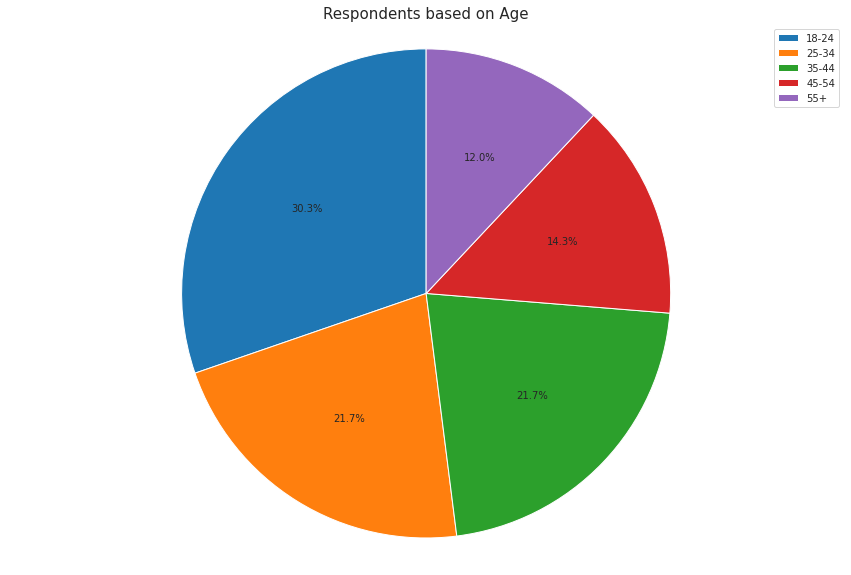

In [26]:
# Pie chart
labels = ['18-24','25-34','35-44','45-54','55+']
sizes = Age_Class['What is your biological sex?']

fig1, ax1 = plt.subplots(figsize=[15,10])
ax1.pie(sizes, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Age', fontsize = 15)

plt.legend(labels=labels)
plt.show()

### Visualize by Biological Sex

In [27]:
Gender_Class = df_Covid_Response.groupby('What is your biological sex?').count()
Gender_Class

Timestamp  ...  I am more willing to take the vaccine if I do not have to do mandatory home quarantine after travelling
What is your biological sex?             ...                                                                                                         
Female                               92  ...                                                 92                                                      
Male                                 83  ...                                                 83                                                      

[2 rows x 22 columns]

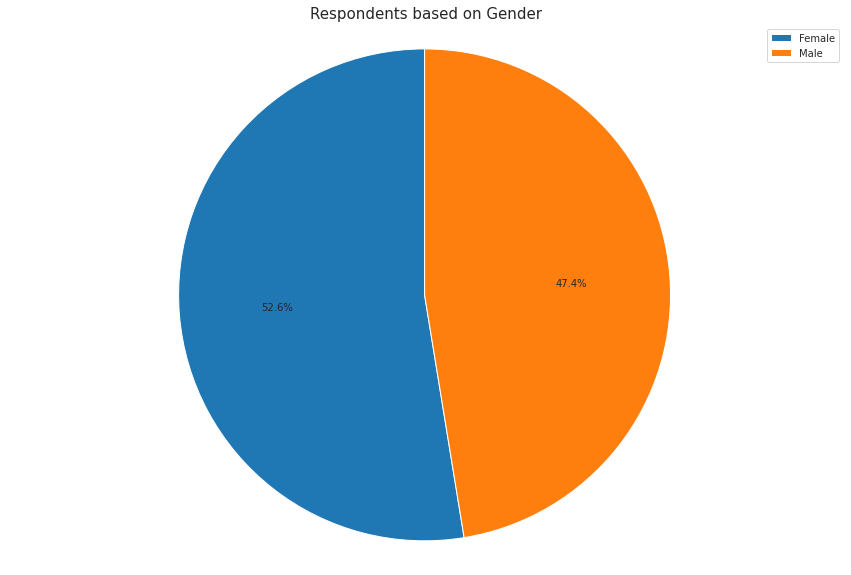

In [28]:
# Pie chart
labels = ['Female','Male']
sizes = Gender_Class['How old are you?']

fig1, ax1 = plt.subplots(figsize=[15,10])
ax1.pie(sizes, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Gender', fontsize = 15)

plt.legend(labels=labels)
plt.show()

### Visualize by Race

In [29]:
Race_Class = df_Covid_Response.groupby('Choose one or more races that you consider yourself to be:').count()
Race_Class

Timestamp  ...  I am more willing to take the vaccine if I do not have to do mandatory home quarantine after travelling
Choose one or more races that you consider your...             ...                                                                                                         
Arab                                                      113  ...                                                113                                                      
Arab;Asian                                                  1  ...                                                  1                                                      
Arab;Black                                                 13  ...                                                 13                                                      
Arab;Black;Muslim                                           1  ...                                                  1                                                      
Arab;Other Asian                                            1  ...                                                  1                                                      
Arab;White                                                 18  ...                                                 18                                                      
Arab;White;Asian                                            3  ...                                                  3                                                      
Asian                                                      21  ...                                                 21                                                      
Black                                                       1  ...                                                  1                                                      
Brown                                                       1  ...                                                  1                                                      
White                                                       2  ...                                                  2                                                      

[11 rows x 22 columns]

In [30]:
df_Covid_Response['Choose one or more races that you consider yourself to be:'].unique()

array(['Black', 'Arab', 'Arab;Black', 'Arab;White', 'Arab;Other Asian',
       'Asian', 'Arab;Asian', 'Arab;Black;Muslim ', 'Brown', 'White',
       'Arab;White;Asian'], dtype=object)

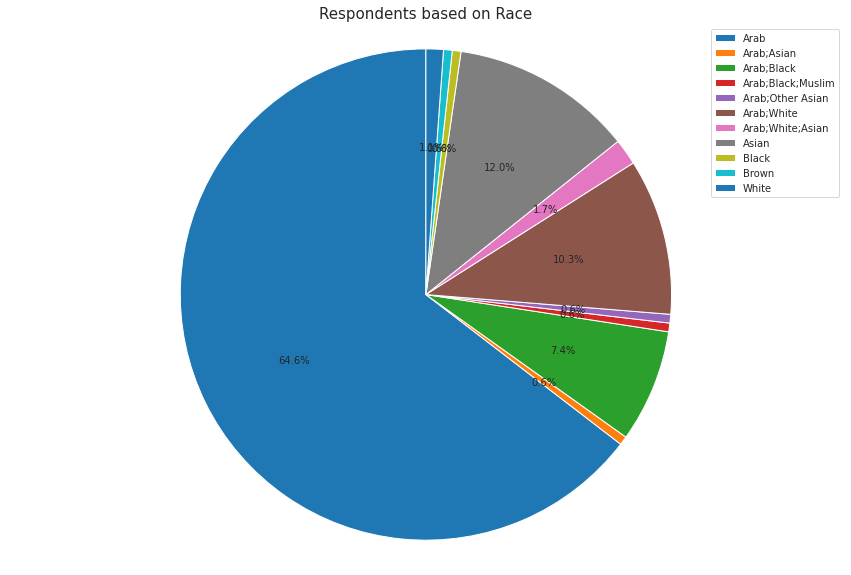

In [31]:
# Pie chart
labels = ['Arab','Arab;Asian','Arab;Black','Arab;Black;Muslim','Arab;Other Asian','Arab;White','Arab;White;Asian','Asian','Black','Brown','White']
sizes = Race_Class['How old are you?']

fig1, ax1 = plt.subplots(figsize=[15,10])
ax1.pie(sizes, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on Race', fontsize = 15)

plt.legend(labels=labels)
plt.show()

## Create Dummy DataFrame

Create Blank Dataframe

In [24]:
df_Covid_Response_dummy = pd.DataFrame()
df_Covid_Response_labels = pd.DataFrame()

Create Dummy Dataset Column by Column

In [25]:
for i in range(1, len(df_Covid_Response.columns)):
  X = df_Covid_Response[df_Covid_Response.columns[i]]
  if ((df_Covid_Response.columns[i] == 'I am willing to take the vaccine') or (df_Covid_Response.columns[i] == 'I have some doubts or hesitations about taking the vaccine')):
    Y = X
    df_Covid_Response_labels = pd.concat([df_Covid_Response_labels, Y], axis=1)
  else:
    Y = pd.get_dummies(X)
    df_Covid_Response_dummy = pd.concat([df_Covid_Response_dummy, Y], axis=1)

print(df_Covid_Response_dummy.shape)
df_Covid_Response_dummy.head(5)

(175, 116)


18-24  25-34  35-44  45-54  55+  Female  ...  2.0  3.0  4.0  5.0  6.0  7.0
0      0      1      0      0    0       0  ...    0    0    0    0    0    1
1      0      0      1      0    0       0  ...    0    0    0    0    1    0
2      0      1      0      0    0       1  ...    0    0    0    0    0    1
3      0      1      0      0    0       0  ...    0    0    0    0    0    1
4      0      1      0      0    0       0  ...    0    0    0    0    0    1

[5 rows x 116 columns]

Convert to a 4-Class Problem

In [26]:
X = np.array(df_Covid_Response_labels)
Labels  = np.zeros((X.shape[0],1))
for i in range(0, X.shape[0]):
  if (X[i,0] >= 3 and X[i,1] < 3):
    Labels[i] = 0  # Willing and Not Hesitant
  elif (X[i,0] >= 3 and X[i,1] >= 3):
    Labels[i] = 1  # Willing but Hesitant
  elif (X[i,0] < 3 and X[i,1] < 3):
    Labels[i] = 2  # Not Willing but not Hesitant (if must take vaccine)
  elif (X[i,0] < 3 and X[i,1] >= 3):
    Labels[i] = 3  # Not Willing and Hesitant

print(Labels.shape)
#
label_column = pd.DataFrame(data=Labels, columns=['Classes'], dtype=np.int8)
label_column.head(5)

(175, 1)


Classes
0        0
1        0
2        1
3        0
4        1

In [27]:
df_Covid_Response_dummy = pd.concat([df_Covid_Response_dummy, label_column], axis=1)
df_Covid_Response_dummy

18-24  25-34  35-44  45-54  55+  Female  ...  3.0  4.0  5.0  6.0  7.0  Classes
0        0      1      0      0    0       0  ...    0    0    0    0    1        0
1        0      0      1      0    0       0  ...    0    0    0    1    0        0
2        0      1      0      0    0       1  ...    0    0    0    0    1        1
3        0      1      0      0    0       0  ...    0    0    0    0    1        0
4        0      1      0      0    0       0  ...    0    0    0    0    1        1
..     ...    ...    ...    ...  ...     ...  ...  ...  ...  ...  ...  ...      ...
170      1      0      0      0    0       1  ...    0    0    0    0    1        0
171      1      0      0      0    0       0  ...    0    0    0    0    1        0
172      1      0      0      0    0       1  ...    0    0    0    0    1        0
173      0      0      0      0    1       1  ...    0    1    0    0    0        0
174      0      0      1      0    0       1  ...    0    0    0    1    0        0

[175 rows x 117 columns]

In [30]:
df_Covid_Response_dummy.to_csv('Vaccine_Dummy.csv')

## Prepare Dataset for PyCaret

In [31]:
df_Covid_Response_dummy = pd.read_csv('Vaccine_Dummy.csv')

In [32]:
if (df_Covid_Response_dummy.isnull().values.any() == False):
  print(f'Total NULL values in the Original DataFrame = {df_Covid_Response_dummy.isnull().sum().sum()}')
  print(df_Covid_Response_dummy.isnull().sum())
  for i in range(0,len(df_Covid_Response_dummy.columns)):
    df_Covid_Response_dummy[df_Covid_Response_dummy.columns[i]] = df_Covid_Response_dummy[df_Covid_Response_dummy.columns[i]].fillna(0)

Total NULL values in the Original DataFrame = 0
Unnamed: 0    0
18-24         0
25-34         0
35-44         0
45-54         0
             ..
4.0.5         0
5.0.5         0
6.0.5         0
7.0.5         0
Classes       0
Length: 118, dtype: int64


In [33]:
df_Covid_Response_dummy

Unnamed: 0  18-24  25-34  35-44  ...  5.0.5  6.0.5  7.0.5  Classes
0             0      0      1      0  ...      0      0      1        0
1             1      0      0      1  ...      0      1      0        0
2             2      0      1      0  ...      0      0      1        1
3             3      0      1      0  ...      0      0      1        0
4             4      0      1      0  ...      0      0      1        1
..          ...    ...    ...    ...  ...    ...    ...    ...      ...
170         170      1      0      0  ...      0      0      1        0
171         171      1      0      0  ...      0      0      1        0
172         172      1      0      0  ...      0      0      1        0
173         173      0      0      0  ...      0      0      0        0
174         174      0      0      1  ...      0      1      0        0

[175 rows x 118 columns]

In [34]:
data = df_Covid_Response_dummy.sample(frac=0.95, random_state=786)
data_unseen = df_Covid_Response_dummy.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (166, 118)
Unseen Data For Predictions: (9, 118)


## Machine Learning based Classification using PyCaret

In [35]:
from pycaret.classification import *

In [36]:
model_train = setup(data= df_Covid_Response_dummy, target = 'Classes')

Description                   Value
0                               session_id                    5317
1                                   Target                 Classes
2                              Target Type              Multiclass
3                            Label Encoded  0: 0, 1: 1, 2: 2, 3: 3
4                            Original Data              (175, 118)
5                           Missing Values                   False
6                         Numeric Features                       1
7                     Categorical Features                     116
8                         Ordinal Features                   False
9                High Cardinality Features                   False
10                 High Cardinality Method                    None
11                   Transformed Train Set              (122, 111)
12                    Transformed Test Set               (53, 111)
13                      Shuffle Train-Test                    True
14                     Stratify Train-Test                   False
15                          Fold Generator         StratifiedKFold
16                             Fold Number                      10
17                                CPU Jobs                      -1
18                                 Use GPU                   False
19                          Log Experiment                   False
20                         Experiment Name        clf-default-name
21                                     USI                    05c8
22                         Imputation Type                  simple
23          Iterative Imputation Iteration                    None
24                         Numeric Imputer                    mean
25      Iterative Imputation Numeric Model                    None
26                     Categorical Imputer                constant
27  Iterative Imputation Categorical Model                    None
28           Unknown Categoricals Handling          least_frequent
29                               Normalize                   False
30                        Normalize Method                    None
31                          Transformation                   False
32                   Transformation Method                    None
33                                     PCA                   False
34                              PCA Method                    None
35                          PCA Components                    None
36                     Ignore Low Variance                   False
37                     Combine Rare Levels                   False
38                    Rare Level Threshold                    None
39                         Numeric Binning                   False
40                         Remove Outliers                   False
41                      Outliers Threshold                    None
42                Remove Multicollinearity                   False
43             Multicollinearity Threshold                    None
44             Remove Perfect Collinearity                    True
45                              Clustering                   False
46                    Clustering Iteration                    None
47                     Polynomial Features                   False
48                       Polynomial Degree                    None
49                    Trignometry Features                   False
50                    Polynomial Threshold                    None
51                          Group Features                   False
52                       Feature Selection                   False
53                Feature Selection Method                 classic
54            Features Selection Threshold                    None
55                     Feature Interaction                   False
56                           Feature Ratio                   False
57                   Interaction Threshold                    None
58                           Fix Imbalance                   False
59         

In [37]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.7378  0.2670  0.6325  0.7262   
rf               Random Forest Classifier    0.7372  0.2677  0.6297  0.7165   
lr                    Logistic Regression    0.7365  0.2585  0.6525  0.7234   
ridge                    Ridge Classifier    0.7032  0.0000  0.5906  0.6914   
knn                K Neighbors Classifier    0.6885  0.2448  0.6522  0.7045   
nb                            Naive Bayes    0.6878  0.2445  0.5169  0.6604   
svm                   SVM - Linear Kernel    0.6795  0.0000  0.6150  0.6865   
gbc          Gradient Boosting Classifier    0.6744  0.2294  0.5167  0.6729   
dt               Decision Tree Classifier    0.6654  0.2181  0.5278  0.6622   
lightgbm  Light Gradient Boosting Machine    0.6551  0.2477  0.4917  0.6235   
ada                  Ada Boost Classifier    0.6481  0.2252  0.5636  0.6231   
lda          Linear Discriminant Analysis    0.4019  0.1532  0.3558  0.5480   
qda       Quadratic Discriminant Analysis    0.1404  0.1500  0.1592  0.2973   

              F1   Kappa     MCC  TT (Sec)  
et        0.7181  0.5452  0.5603     0.258  
rf        0.7173  0.5367  0.5498     0.268  
lr        0.7205  0.5395  0.5532     0.250  
ridge     0.6886  0.4825  0.4947     0.007  
knn       0.6645  0.4576  0.4907     0.069  
nb        0.6471  0.4299  0.4648     0.008  
svm       0.6499  0.4384  0.4667     0.037  
gbc       0.6537  0.4453  0.4618     0.145  
dt        0.6562  0.4329  0.4417     0.008  
lightgbm  0.6300  0.3955  0.4091     0.058  
ada       0.6220  0.3861  0.4017     0.041  
lda       0.4218  0.1082  0.1139     0.009  
qda       0.1590  0.0549  0.0862     0.010

In [38]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5317, verbose=0,
                     warm_start=False)


In [39]:
tuned_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8462  0.8910  0.7000  0.8187  0.8192  0.7524  0.7673
1       0.6923  0.8407  0.6000  0.7564  0.6538  0.5185  0.5671
2       0.8333  0.0000  0.8778  0.8333  0.8333  0.7073  0.7073
3       0.8333  0.0000  0.8667  0.8750  0.8244  0.7000  0.7391
4       0.5833  0.0000  0.3083  0.5903  0.5655  0.2593  0.2772
5       0.6667  0.0000  0.7667  0.6944  0.6586  0.4545  0.4709
6       0.5833  0.0000  0.6889  0.5774  0.5762  0.2593  0.2626
7       0.9167  0.0000  0.9444  0.9306  0.9167  0.8554  0.8659
8       0.8333  0.0000  0.4500  0.8452  0.8319  0.7073  0.7252
9       0.7500  0.8658  0.6500  0.6944  0.7197  0.5909  0.5987
Mean    0.7538  0.2597  0.6853  0.7616  0.7399  0.5805  0.5981
SD      0.1111  0.3969  0.1871  0.1136  0.1155  0.1944  0.1952

In [40]:
evaluate_model(best_model)  # Confusion Matrix

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [64]:
evaluate_model(best_model)  # ROC Curves (Each Class)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [65]:
evaluate_model(best_model)  # Precision-Recall Curve (Area Plot)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [66]:
evaluate_model(best_model)  # Precision Error Historgram

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [67]:
evaluate_model(best_model)  # Classification Report

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [41]:
predict_model(best_model);

Model  Accuracy     AUC  ...     F1  Kappa     MCC
0  Extra Trees Classifier    0.7358  0.9348  ...  0.726  0.528  0.5467

[1 rows x 8 columns]

In [42]:
predict_model(tuned_model);

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Extra Trees Classifier    0.5849  0.7906  ...  0.5686  0.2929  0.3143

[1 rows x 8 columns]

In [43]:
final_model = finalize_model(tuned_model)
print(final_model)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=11, max_features='log2',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.01, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                     oob_score=False, random_state=5317, verbose=0,
                     warm_start=False)


In [44]:
predict_model(final_model);

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Extra Trees Classifier    0.7736  0.8569  ...  0.7723  0.6157  0.6306

[1 rows x 8 columns]

In [45]:
unseen_predictions = predict_model(final_model, data=data_unseen)
unseen_predictions.head()

Unnamed: 0  18-24  25-34  35-44  45-54  ...  6.0.5  7.0.5  Classes  Label   Score
0          20      1      0      0      0  ...      0      1        0      0  0.5833
1          30      1      0      0      0  ...      0      1        0      0  0.5225
2          64      0      0      1      0  ...      0      1        0      0  0.4870
3          87      1      0      0      0  ...      0      0        1      1  0.4401
4         103      0      0      1      0  ...      0      0        1      1  0.4639

[5 rows x 120 columns]

In [46]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Classes'], unseen_predictions['Label'], metric = 'Accuracy')

0.8889

## Dominance Analysis (DA)

In [ ]:
pip install dominance-analysis

In [ ]:
df_Covid_Response_dummy = pd.read_csv('Vaccine_Dummy_2_2.csv')

In [ ]:
df_Covid_Response_dummy.drop(columns=[df_Covid_Response_dummy.columns[0]], inplace=True)

In [ ]:
df_Covid_Response_dummy

How old are you?  ...  Classes
0                   1  ...        0
1                   2  ...        0
2                   1  ...        1
3                   1  ...        0
4                   1  ...        1
..                ...  ...      ...
170                 0  ...        0
171                 0  ...        0
172                 0  ...        0
173                 4  ...        0
174                 2  ...        0

[175 rows x 23 columns]

In [ ]:
print(f'Total NULL values in the Original DataFrame = {df_Covid_Response_dummy.isnull().sum().sum()}')
if (df_Covid_Response_dummy.isnull().values.any() == True):
  for i in range(0,len(df_Covid_Response_dummy.columns)):
    df_Covid_Response_dummy[df_Covid_Response_dummy.columns[i]] = df_Covid_Response_dummy[df_Covid_Response_dummy.columns[i]].fillna(0)

Total NULL values in the Original DataFrame = 8


In [ ]:
df_Covid_Response_dummy.isnull().sum()

How old are you?                                                                                           0
What is your biological sex?                                                                               0
Choose one or more races that you consider yourself to be:                                                 0
What is the highest level of school you have completed or the highest degree you have received?            0
What is your current employment status?                                                                    0
What is your relationship status?                                                                          0
Did you take the COVID-19 Vaccine?                                                                         0
Have you taken a flu vaccine in the past?                                                                  0
Did you take the vaccine in Qatar?                                                                         0
What were the side 

### Dominance Analysis on Willingness

In [ ]:
df_Covid_Response_W = df_Covid_Response_dummy.drop(columns=['I have some doubts or hesitations about taking the vaccine','Classes'])
df_Covid_Response_W

How old are you?  ...  I am willing to take the vaccine
0                   1  ...                                 7
1                   2  ...                                 7
2                   1  ...                                 4
3                   1  ...                                 7
4                   1  ...                                 7
..                ...  ...                               ...
170                 0  ...                                 7
171                 0  ...                                 5
172                 0  ...                                 7
173                 4  ...                                 4
174                 2  ...                                 6

[175 rows x 21 columns]

In [ ]:
from dominance_analysis import Dominance
dominance_regression = Dominance(data=df_Covid_Response_W,target='I am willing to take the vaccine', objective=1)

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['How old are you?', 'What is the highest level of school you have completed or the highest degree you have received?', 'What is your relationship status?', 'Did you take the COVID-19 Vaccine?', 'Did you take the vaccine in Qatar?', 'What were the side effects you experienced from taking previous vaccines?', 'Based on my previous experience with vaccines, I have concerns with taking the COVID-19 Vaccine.', 'Seeing Public Figures or Heads of State take the vaccine increases my willingness to take the vaccine', 'My Religious background and/or affiliations make me unwilling to take the vaccine', 'I am willing to take the vaccine if it means that lockdown restrictions are reduced', 'I use the Ehteraz application:2', 'I check the statistics of COVID-19 cases in Qatar using the app:', 'I am more willing to take the vaccine if Ehteraz shows a special color for vaccinated people', 'I am more willing to take the vaccine if I do n

In [ ]:
incr_variable_rsquare = dominance_regression.incremental_rsquare()



  0%|          | 0/15 [00:00<?, ?it/s]

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['How old are you?', 'What is the highest level of school you have completed or the highest degree you have received?', 'What is your relationship status?', 'Did you take the COVID-19 Vaccine?', 'Did you take the vaccine in Qatar?', 'What were the side effects you experienced from taking previous vaccines?', 'Based on my previous experience with vaccines, I have concerns with taking the COVID-19 Vaccine.', 'Seeing Public Figures or Heads of State take the vaccine increases my willingness to take the vaccine', 'My Religious background and/or affiliations make me unwilling to take the vaccine', 'I am willing to take the vaccine if it means that lockdown restrictions are reduced', 'I use the Ehteraz application:2', 'I check the statistics of COVID-19 cases in Qatar using the app:', 'I am more willing to take the vaccine if Ehteraz shows a special color for vaccinated people', 'I am more willing to take the vaccine if I do n



 13%|█▎        | 2/15 [00:00<00:02,  5.26it/s]

 20%|██        | 3/15 [00:01<00:06,  1.76it/s]

 27%|██▋       | 4/15 [00:06<00:19,  1.74s/it]

 33%|███▎      | 5/15 [00:16<00:41,  4.18s/it]

 40%|████      | 6/15 [00:32<01:11,  7.89s/it]

 47%|████▋     | 7/15 [00:54<01:36, 12.01s/it]

 53%|█████▎    | 8/15 [01:15<01:44, 14.87s/it]

 60%|██████    | 9/15 [01:32<01:33, 15.50s/it]

 67%|██████▋   | 10/15 [01:43<01:09, 13.92s/it]

 73%|███████▎  | 11/15 [01:47<00:44, 11.16s/it]

 80%|████████  | 12/15 [01:49<00:24,  8.30s/it]

100%|██████████| 15/15 [01:49<00:00,  7.32s/it]


  0%|          | 0/14 [00:00<?, ?it/s]

 21%|██▏       | 3/14 [00:00<00:00, 22.84it/s]

#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################




 29%|██▊       | 4/14 [00:01<00:04,  2.10it/s]

 36%|███▌      | 5/14 [00:09<00:25,  2.80s/it]

 43%|████▎     | 6/14 [00:40<01:29, 11.20s/it]

 50%|█████     | 7/14 [01:50<03:22, 28.87s/it]

 57%|█████▋    | 8/14 [03:19<04:40, 46.83s/it]

 64%|██████▍   | 9/14 [04:30<04:30, 54.18s/it]

 71%|███████▏  | 10/14 [05:01<03:08, 47.14s/it]

 79%|███████▊  | 11/14 [05:08<01:45, 35.19s/it]

100%|██████████| 14/14 [05:09<00:00, 22.13s/it]

#########################  Variable Dominance Calculation Done!!!!!  #########################



In [ ]:
plt.show(dominance_regression.plot_incremental_rsquare())

In [ ]:
dominance_regression.dominance_stats()

In [ ]:
dominance_regression.dominance_level()

### Dominance Analysis for Hesistancy

In [ ]:
df_Covid_Response_H = df_Covid_Response_dummy.drop(columns=['I am willing to take the vaccine','Classes'])
df_Covid_Response_H

In [ ]:
from dominance_analysis import Dominance
dominance_regression = Dominance(data=df_Covid_Response_H,target='I have some doubts or hesitations about taking the vaccine', objective=1)

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['How old are you?', 'What is your biological sex?', 'Choose one or more races that you consider yourself to be:', 'What is the highest level of school you have completed or the highest degree you have received?', 'What is your relationship status?', 'Did you take the COVID-19 Vaccine?', 'Based on my previous experience with vaccines, I have concerns with taking the COVID-19 Vaccine.', 'Taking the vaccine should be a personal choice if I am following safety procedures', 'Seeing Public Figures or Heads of State take the vaccine increases my willingness to take the vaccine', 'My Religious background and/or affiliations make me unwilling to take the vaccine', 'I am willing to take the vaccine if it means that lockdown restrictions are reduced', 'I check the statistics of COVID-19 cases in Qatar using the app:', 'I am more willing to take the vaccine if Ehteraz shows a special color for vaccinated people', 'I am more willing

In [ ]:
incr_variable_rsquare = dominance_regression.incremental_rsquare()




  0%|          | 0/15 [00:00<?, ?it/s]

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['How old are you?', 'What is your biological sex?', 'Choose one or more races that you consider yourself to be:', 'What is the highest level of school you have completed or the highest degree you have received?', 'What is your relationship status?', 'Did you take the COVID-19 Vaccine?', 'Based on my previous experience with vaccines, I have concerns with taking the COVID-19 Vaccine.', 'Taking the vaccine should be a personal choice if I am following safety procedures', 'Seeing Public Figures or Heads of State take the vaccine increases my willingness to take the vaccine', 'My Religious background and/or affiliations make me unwilling to take the vaccine', 'I am willing to take the vaccine if it means that lockdown restrictions are reduced', 'I check the statistics of COVID-19 cases in Qatar using the app:', 'I am more willing to take the vaccine if Ehteraz shows a special color for vaccinated people', 'I am more willing




 13%|█▎        | 2/15 [00:00<00:02,  5.09it/s]


 20%|██        | 3/15 [00:01<00:07,  1.68it/s]


 27%|██▋       | 4/15 [00:06<00:19,  1.78s/it]


 33%|███▎      | 5/15 [00:16<00:42,  4.26s/it]


 40%|████      | 6/15 [00:33<01:12,  8.04s/it]


 47%|████▋     | 7/15 [00:55<01:37, 12.15s/it]


 53%|█████▎    | 8/15 [01:17<01:45, 15.12s/it]


 60%|██████    | 9/15 [01:34<01:34, 15.78s/it]


 67%|██████▋   | 10/15 [01:44<01:10, 14.17s/it]


 73%|███████▎  | 11/15 [01:49<00:45, 11.35s/it]


 80%|████████  | 12/15 [01:51<00:25,  8.43s/it]


100%|██████████| 15/15 [01:51<00:00,  7.45s/it]



  0%|          | 0/14 [00:00<?, ?it/s]


 21%|██▏       | 3/14 [00:00<00:00, 22.37it/s]

#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################





 29%|██▊       | 4/14 [00:01<00:04,  2.35it/s]


 36%|███▌      | 5/14 [00:09<00:25,  2.81s/it]


 43%|████▎     | 6/14 [00:40<01:29, 11.17s/it]


 50%|█████     | 7/14 [01:44<03:08, 26.97s/it]


 57%|█████▋    | 8/14 [03:04<04:17, 42.93s/it]


 64%|██████▍   | 9/14 [04:05<04:02, 48.42s/it]


 71%|███████▏  | 10/14 [04:35<02:50, 42.70s/it]


 79%|███████▊  | 11/14 [04:42<01:35, 32.00s/it]


100%|██████████| 14/14 [04:43<00:00, 20.22s/it]

#########################  Variable Dominance Calculation Done!!!!!  #########################



In [ ]:
plt.show(dominance_regression.plot_incremental_rsquare())

In [ ]:
dominance_regression.dominance_stats()

Interactional Dominance  ... Percentage Relative Importance
Seeing Public Figures or Heads of State take th...               0.0577005  ...                         31.141
Did you take the COVID-19 Vaccine?                               0.0315393  ...                         13.506
Taking the vaccine should be a personal choice ...               0.0253623  ...                        10.5569
What is your biological sex?                                     0.0290999  ...                        8.21979
I am more willing to take the vaccine if I do n...              0.00185147  ...                        7.36226
I am more willing to take the vaccine if Ehtera...             0.000254958  ...                        7.21688
I am willing to take the vaccine if it means th...             0.000414867  ...                        5.44177
My Religious background and/or affiliations mak...               0.0114394  ...                        4.88919
What is the highest level of school you have co...               0.0124573  ...                        3.06943
How old are you?                                                0.00864499  ...                        2.11112
Based on my previous experience with vaccines, ...             0.000720618  ...                        1.58207
I check the statistics of COVID-19 cases in Qat...              0.00368106  ...                        1.44452
Choose one or more races that you consider your...               0.0034536  ...                         1.3937
I am more willing to take the vaccine if I do n...             1.96421e-06  ...                        1.28968
What is your relationship status?                               0.00225377  ...                       0.775728

[15 rows x 5 columns]

In [ ]:
dominance_regression.dominance_level()

### Dominance Analysis for 4-Class Problem

In [ ]:
df_Covid_Response_C = df_Covid_Response_dummy.drop(columns=['I am willing to take the vaccine','I have some doubts or hesitations about taking the vaccine'])
df_Covid_Response_C

How old are you?  ...  Classes
0                   1  ...        0
1                   2  ...        0
2                   1  ...        1
3                   1  ...        0
4                   1  ...        1
..                ...  ...      ...
170                 0  ...        0
171                 0  ...        0
172                 0  ...        0
173                 4  ...        0
174                 2  ...        0

[175 rows x 21 columns]

In [ ]:
from dominance_analysis import Dominance
dominance_regression = Dominance(data=df_Covid_Response_C,target='Classes', objective=1)

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['How old are you?', 'What is the highest level of school you have completed or the highest degree you have received?', 'Did you take the COVID-19 Vaccine?', 'Did you take the vaccine in Qatar?', 'What were the side effects you experienced from taking previous vaccines?', 'Based on my previous experience with vaccines, I have concerns with taking the COVID-19 Vaccine.', 'Taking the vaccine should be a personal choice if I am following safety procedures', 'Seeing Public Figures or Heads of State take the vaccine increases my willingness to take the vaccine', 'My Religious background and/or affiliations make me unwilling to take the vaccine', 'I am willing to take the vaccine if it means that lockdown restrictions are reduced', 'I use the Ehteraz application:2', 'I check the statistics of COVID-19 cases in Qatar using the app:', 'I am more willing to take the vaccine if Ehteraz shows a special color for vaccinated people',

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
incr_variable_rsquare = dominance_regression.incremental_rsquare()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning:

invalid value encountered in true_divide

  0%|          | 0/15 [00:00<?, ?it/s]

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['How old are you?', 'What is the highest level of school you have completed or the highest degree you have received?', 'Did you take the COVID-19 Vaccine?', 'Did you take the vaccine in Qatar?', 'What were the side effects you experienced from taking previous vaccines?', 'Based on my previous experience with vaccines, I have concerns with taking the COVID-19 Vaccine.', 'Taking the vaccine should be a personal choice if I am following safety procedures', 'Seeing Public Figures or Heads of State take the vaccine increases my willingness to take the vaccine', 'My Religious background and/or affiliations make me unwilling to take the vaccine', 'I am willing to take the vaccine if it means that lockdown restrictions are reduced', 'I use the Ehteraz application:2', 'I check the statistics of COVID-19 cases in Qatar using the app:', 'I am more willing to take the vaccine if Ehteraz shows a special color for vaccinated people',

 21%|██▏       | 3/14 [00:00<00:00, 21.21it/s]

#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 14/14 [04:24<00:00, 18.90s/it]

#########################  Variable Dominance Calculation Done!!!!!  #########################



In [ ]:
plt.show(dominance_regression.plot_incremental_rsquare())

In [ ]:
dominance_regression.dominance_stats()

Interactional Dominance  ... Percentage Relative Importance
I am more willing to take the vaccine if I do n...               0.0237642  ...                        19.2419
Seeing Public Figures or Heads of State take th...               0.0155829  ...                        14.8461
I am more willing to take the vaccine if Ehtera...              0.00920603  ...                        14.0219
I am willing to take the vaccine if it means th...              0.00206577  ...                         13.005
Did you take the COVID-19 Vaccine?                              0.00395476  ...                        6.90877
Did you take the vaccine in Qatar?                               0.0412998  ...                        6.65103
I am more willing to take the vaccine if I do n...             0.000303059  ...                        6.41002
My Religious background and/or affiliations mak...               0.0158954  ...                        5.30301
What were the side effects you experienced from...                0.019787  ...                        4.47358
Based on my previous experience with vaccines, ...              0.00953257  ...                          4.285
Taking the vaccine should be a personal choice ...              0.00551903  ...                        1.50525
I use the Ehteraz application:2                                 0.00299022  ...                        1.15072
How old are you?                                                0.00367852  ...                         1.1482
I check the statistics of COVID-19 cases in Qat...               0.0037619  ...                       0.719629
What is the highest level of school you have co...             0.000143684  ...                       0.329823

[15 rows x 5 columns]